<a href="https://colab.research.google.com/github/cusiandrea/hello-world/blob/main/Previsione_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin price daily prediction

Time series analysis and model training.

In [ ]:
#!git clone https://github.com/ProfAI/machine-learning-avanzato.git

In [ ]:
#!pip install statsmodels

In [ ]:
#utils
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.dates as mdates

#prediction time series
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA

#metrics
from sklearn.metrics import mean_squared_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [ ]:
df = pd.read_csv('machine-learning-avanzato/datasets/coin_Bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
len(df)

2991

In [ ]:
df['Date'].min(), df['Date'].max()

('2013-04-29 23:59:59', '2021-07-06 23:59:59')

In [ ]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df = df.loc[:,['Date', 'High', 'Low', 'Open', 'Close']]
df = df.set_index('Date', drop=True)
df.head()

,High,Low,Open,Close
Date,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000


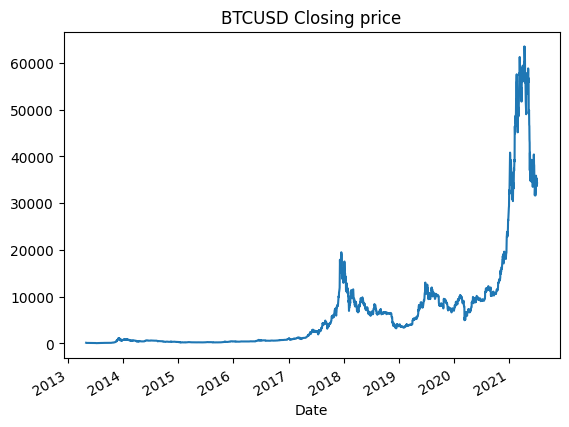

In [ ]:
_=df['Close'].plot(title='BTCUSD Closing price')

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('Test ADF statistic: ', result[0])
print('p-value: ', result[1])

Test ADF statistic:  -0.7973098451195595
p-value:  0.8199110033239155


In [ ]:
def test_ADF(x, pvalue=0.05):
  result = adfuller(x)
  if result[1] <= pvalue:
    return True
  return False

In [ ]:
test_ADF(df['Close'])

False

<Axes: xlabel='Date'>

Is stationary? False


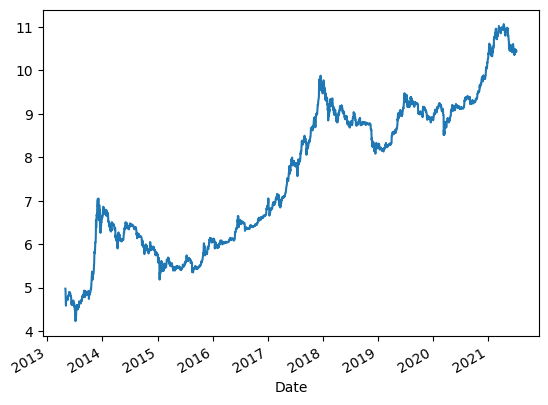

In [ ]:
df['Close_log'] = np.log(df['Close'])
df['Close_log'].plot()
print(f'Is stationary? {test_ADF(df["Close_log"])}')

Is stationary? True


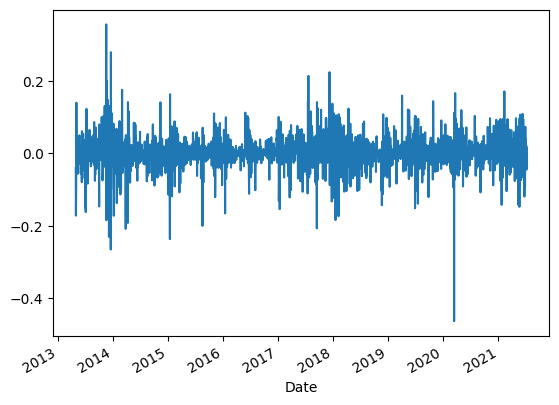

In [ ]:
df['Close_log_diff'] = df['Close_log'] - df['Close_log'].shift(1)
df.dropna(inplace=True)
_ = df['Close_log_diff'].plot()
print(f'Is stationary? {test_ADF(df["Close_log_diff"])}')

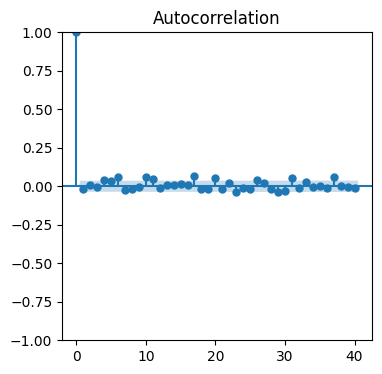

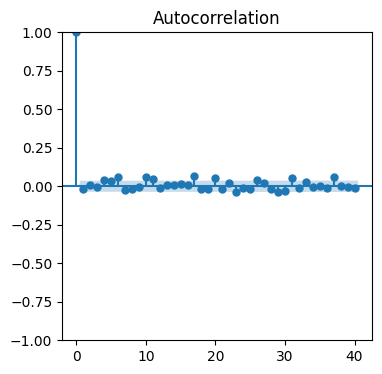

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fix, ax = plt.subplots(1, sharex=True, figsize=(4,4))
plot_acf(df['Close_log_diff'], lags=40, ax=ax)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


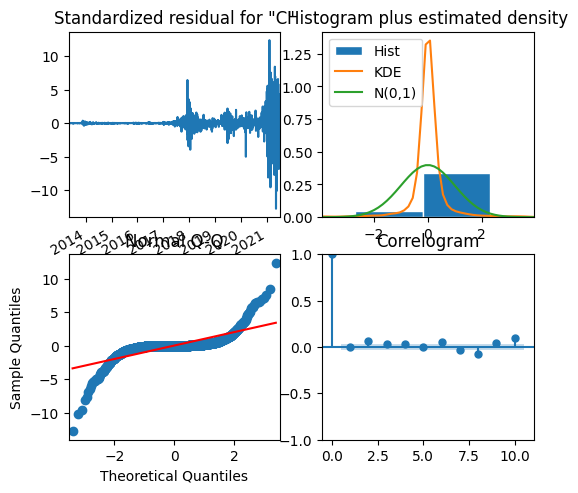

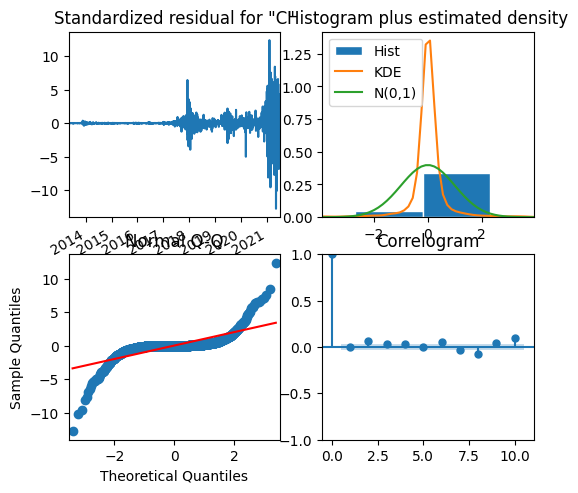

In [ ]:
model = ARIMA(df['Close'], order=(1, 1, 0))
model_fit = model.fit()

model_fit.plot_diagnostics(figsize=(6,6))

In [ ]:
TIMESTP = 2500
train, test = df['Close'][:TIMESTP], df['Close'][TIMESTP:]
len(train), len(test)

(2500, 490)

Printing Predicted vs Expected values




<ipython-input-39-57a6bbe1aaec>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = test[t]



 Mean Error in predicting Test Case: 2.858838  %


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Expected VS Predicted Forecasting')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Closing Price')

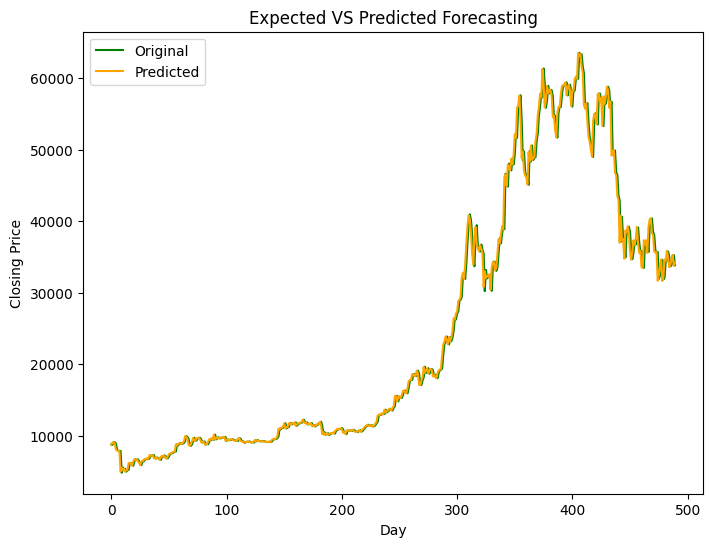

In [ ]:
history = [x for x in train]
y_hats = list()
ys = list()
error_ls = list()

print('Printing Predicted vs Expected values')
print('\n')

for t in range(len(test)):
  model = ARIMA(history, order=(1, 1, 0)).fit()

  output = model.forecast()
  pred_value = output[0]

  original_value = test[t]
  history.append(original_value)

  #calculating the error
  err = ((abs(pred_value - original_value)) / original_value) * 100
  error_ls.append(err)

  y_hats.append(float(pred_value))
  ys.append(float(original_value))


print('\n Mean Error in predicting Test Case: %f ' %(sum(error_ls) / len(error_ls)), '%')
plt.figure(figsize=(8,6))
test_day = [t for t in range(len(test))]
labels = {'Original', 'Predicted'}
plt.plot(test_day, y_hats, color='green')
plt.plot(test_day, ys, color='orange')
plt.title('Expected VS Predicted Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()



 Mean Error in predicting Test Case: 2.858838  %


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Expected VS Predicted Forecasting')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Closing Price')

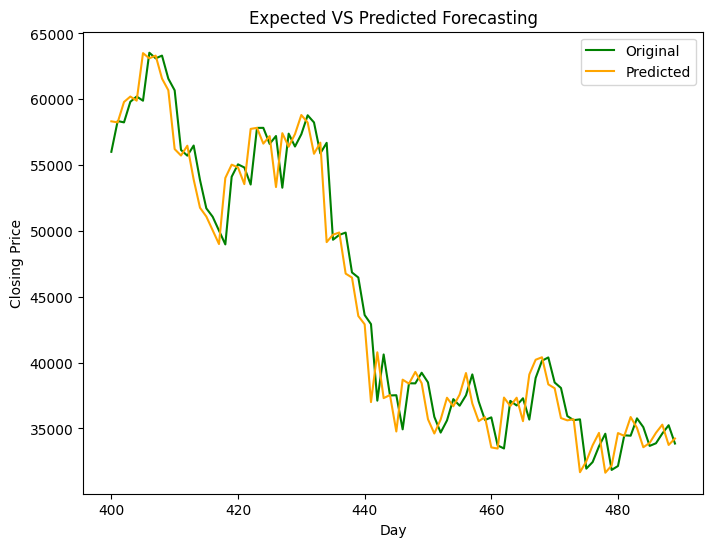

In [ ]:
print('\n Mean Error in predicting Test Case: %f ' %(sum(error_ls) / len(error_ls)), '%')
plt.figure(figsize=(8,6))
test_day = [t for t in range(len(test))]
labels = {'Original', 'Predicted'}
plt.plot(test_day[400:], y_hats[400:], color='green')
plt.plot(test_day[400:], ys[400:], color='orange')
plt.title('Expected VS Predicted Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()